In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
sns.set()

In [2]:
years = []
attendance = []

f = open('national_park_attendance.txt', 'r')
for line in f.readlines():
    parsed_line = line.strip().split('\t')
    for year in parsed_line[::2]:
        years.append(year)
    for num_visitors in parsed_line[1::2]:
        attendance.append(num_visitors)
        
del years[54]
del attendance[54]
years = [ int(year) for year in years ]
attendance = [ int(num.replace(',','').replace('.','')) / 1e6 for num in attendance ]

indices = np.argsort(years)

years = [ years[index] for index in indices ]
attendance = [ attendance[index] for index in indices ]

FileNotFoundError: [Errno 2] No such file or directory: 'national_park_attendance.txt'

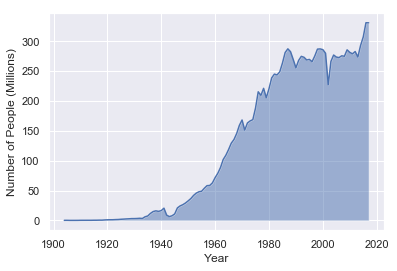

In [446]:
plt.plot(years, attendance)
plt.fill_between(years, attendance, [ 0 for _ in attendance ],  alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of People (Millions)');
plt.savefig('NP_attendance.png', dpi=300)

In [5]:
cali_NP_attendance = pd.read_csv('../data/Annual Summary Report (1904 - Last Calendar Year).csv')
years = [ int(year) for year in cali_NP_attendance.loc[685:, 'ParkName'].values ] 
attendance = [ int(count.replace(',','')) / 1e6 for count in cali_NP_attendance.loc[685:, 'RecreationVisitors'].values ]

In [6]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

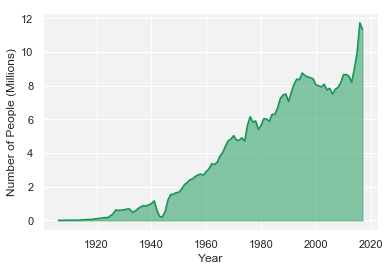

In [17]:
sns.set()
sns.set_style({'patch.edgecolor': '0.75', 'axes.facecolor': '0.95'})
#sns.set_palette(sns.color_palette("Set2"))
plt.plot(years, attendance, c='#149556')
plt.fill_between(years, attendance, [ 0 for _ in attendance ],  alpha=0.5, color='#149556')
plt.xlabel('Year')
plt.ylabel('Number of People (Millions)');
plt.savefig('NP_attendance.png', dpi=300)